In [7]:
import pandas as pd

# Load the datasets
sirs_file_path = '../data/Dartmouth Data Set- SIRS .xlsx'
feis_file_path = '../data/Dartmouth FEIS Data.xlsx'

sirs_data = pd.read_excel(sirs_file_path)
feis_data = pd.read_excel(feis_file_path)

# Renaming the column in FEIS dataset to match the SIRS dataset for merging
feis_data.rename(columns={'Respondent ID #  (SIRS Local ID)': 'Local ID'}, inplace=True)

# Merging the datasets on 'Local ID'
merged_data = pd.merge(sirs_data, feis_data, on='Local ID', how='inner')

In [8]:
merged_data

,Local ID,Date Enrolled in START,Status,Status Date,Time Enrolled in START,Source of referral to START,Suitability of enrollment in START,Individual/Caregiver reliable access to technology,Presenting problems at time of enrollment,Services at Enrollment,...,"In\nthe past year, did your family member use in-patient psychiatric services?","If\nyes, were the inpatient services that your family member received helpful to\nhim/her in your opinion? ?",How\nmuch help was available to you at night or on weekends if your family member\nhad a crisis?,Are\nthere options outside of the hospital for individuals experiencing a crisis to\ngo for help (i.e. crisis/hospital diversion beds)?,Who\nwas the primary source of information about your family memberâ€™s mental health\nservices?,"If other, please describe..2","During the past year, how much involvement\ndid you want to have in your family memberâ€™s treatment plan?",Was there any particular service that your\nfamily member needed that was not available?,"If yes, please describe the service.",What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?
0,321686,2015-09-01,Active,2015-09-30,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,NaN,"Aggression (physical, verbal, property destruc...","Behavioral support services, Case management/s...",...,No,NaN,Very little,None at all,Your family member him/herself,NaN,A lot,No,NaN,NaN
1,379503C,2016-01-01,Active,2016-01-28,Business Hours (Monday - Friday 8am - 5pm),Other: Managed Care Organization,Appropriate,NaN,"Aggression (physical, verbal, property destruc...",NaN,...,Yes,None at all,None at all,None at all,Other,Hospital psychiatrist,A lot,Yes,Therapeutic/ABA/In home help/ Male Mentorship ...,To understnad the frustration of families who ...
2,401268C,2016-03-01,Active,2016-03-03,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,NaN,Self-injurious,Enhanced staffing (1:1 or 2:1 staff),...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,382885,2016-07-01,Active,2016-07-11,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,NaN,"Aggression (physical, verbal, property destruc...","Case management/service coordination, Mental h...",...,No,Did not know/answer,None at all,"Some, but not as much as was needed/wanted",His/her psychiatrist,NaN,A lot,Yes,Crisis services,NaN
4,322773,2016-09-01,Active,2016-09-09,Business Hours (Monday - Friday 8am - 5pm),Other: OPWDD,Appropriate,NaN,"Aggression (physical, verbal, property destruc...","Case management/service coordination, Mental h...",...,No,None at all,None at all,None at all,His/her psychiatrist,NaN,A lot,Yes,Ivan has no insurance and no services. He nee...,It is hard. No one helps you. You have to ke...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,8093984,2020-12-01,Inactive (stable functioning),2021-12-08,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,"Laptop/desktop, Telephone landline","Aggression (physical, verbal, property destruc...","Behavioral support services, Case management/s...",...,Yes,"Some, but not as much as was needed/wanted",Very little,Very little,Your family member him/herself,NaN,A lot,Yes,Not sure what is missing,NaN
1093,6264999,2020-08-01,Inactive (no longer requesting services),2021-12-09,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,"Cell phone service, Smartphone","Aggression (physical, verbal, property destruc...","Behavioral support services, Case management/s...",...,Yes,"Some, but not as much as was needed/wanted",Very little,None at all,Your family member him/herself,NaN,Very little,No,NaN,NaN
1094,8191483,2020-02-01,Inactive (no longer requesting services),2021-12-09,Business Hours (Monday - Friday 8am - 5pm),Family member,Appropriate,NaN,"Aggression (physical, v

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orenpoleshuckkinel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/orenpoleshuckkinel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['na'] not in stop_words.
  warnings.warn(
/var/folders/ss/3094bd1s7k55hnfygclmswz00000gn/T/ipykernel_87846/1423614013.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_covid_df['topic'] = df.loc[before_covid_df.index, 'topic']
/var/folders/ss

Topics identified in all responses:
Topic 1: aba peopl therapi famili behavior
Topic 2: program day famili better individu
Topic 3: provid servic commun get behavior
Topic 4: therapi behavior famili listen support
Topic 5: child care inpati get appoint
Topic 6: crisi respit intervent hab residenti
Topic 7: placement psychiatrist avail access crisi
Topic 8: commun respit provid habilit individu
Topic 9: famili provid respit patient individu
Topic 10: support home famili provid respit

Percent of responses in each topic before COVID-19:
Topic 1: 38.79%
Topic 2: 4.89%
Topic 3: 5.46%
Topic 4: 9.48%
Topic 5: 1.44%
Topic 6: 10.34%
Topic 7: 3.74%
Topic 8: 9.77%
Topic 9: 5.17%
Topic 10: 10.92%

Percent of responses in each topic after COVID-19:
Topic 1: 33.70%
Topic 2: 4.66%
Topic 3: 3.77%
Topic 4: 15.96%
Topic 5: 2.44%
Topic 6: 5.76%
Topic 7: 6.65%
Topic 8: 10.20%
Topic 9: 6.87%
Topic 10: 9.98%


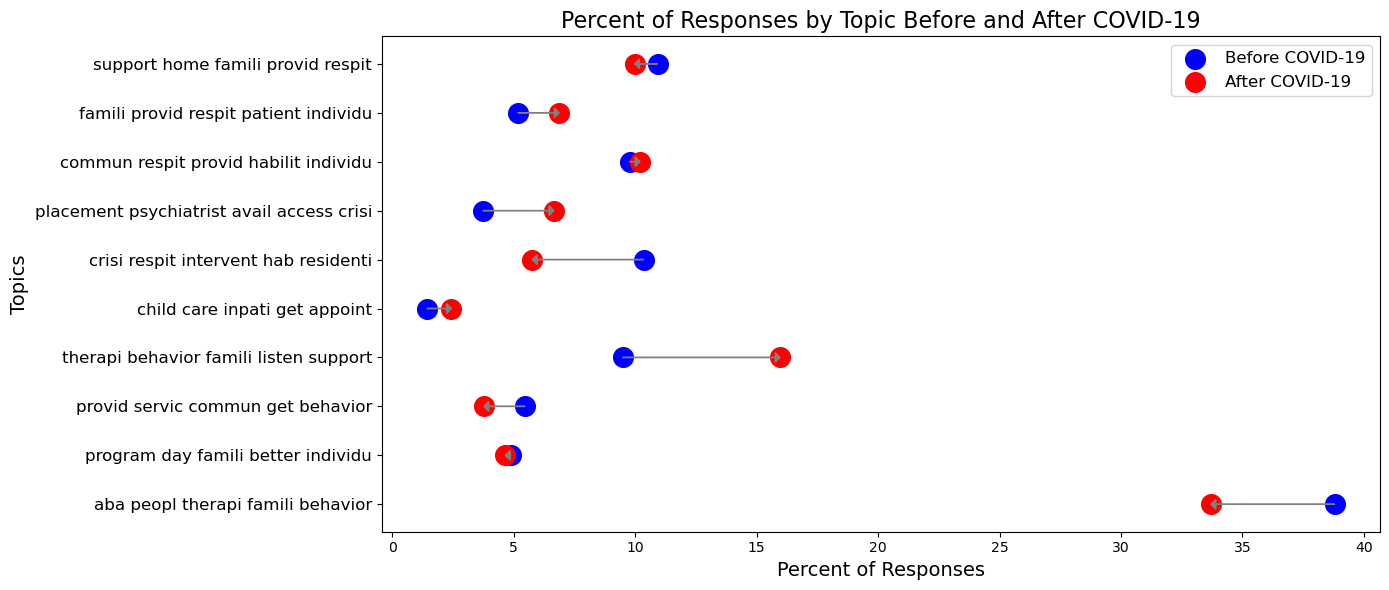

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Load the dataset
file_path = '../data/Dartmouth FEIS Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Cohort')

# Extract relevant text columns
text_columns = [
    'If yes, please describe the service.',
    'What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?'
]
date_column = 'End Date'

# Ensure the Date column is in datetime format
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

# Combine the text columns into a single text corpus
df['combined_text'] = df[text_columns].fillna('').astype(str).apply(lambda row: ' '.join(row), axis=1)

# Define the COVID-19 start date and the one year period before it
covid_start_date = pd.Timestamp('2020-03-13')
one_year_before_covid = covid_start_date - pd.DateOffset(years=1)

# Filter the dataset for the one year before COVID-19
before_covid_df = df[(df[date_column] >= one_year_before_covid) & (df[date_column] < covid_start_date)]
after_covid_df = df[df[date_column] >= covid_start_date]

# Preprocess the text data
custom_stopwords = ['services', 'need', 'help', 'know', 'would', 'many', 'needs', 'none', 'N/A', 'provided', 'nothing', 'unknown', 'NA', 'no']
stop_words = list(set(stopwords.words('english'))) + custom_stopwords

# Tokenize and stem the text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['tokenized_text'] = df['combined_text'].apply(preprocess_text)

# Apply CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words)
text_matrix = vectorizer.fit_transform(df['tokenized_text'])

# Apply LDA for topic modeling
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=69)
lda.fit(text_matrix)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(' '.join(topic_words))
    return topics

feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, 5)  # Display top 5 words per topic

# Get topic distribution for each document
topic_distribution = lda.transform(text_matrix)

# Assign each document to the most probable topic
df['topic'] = np.argmax(topic_distribution, axis=1)

# Count the number of cases in each topic before and after COVID
before_covid_df['topic'] = df.loc[before_covid_df.index, 'topic']
after_covid_df['topic'] = df.loc[after_covid_df.index, 'topic']

before_covid_topic_counts = before_covid_df['topic'].value_counts().reindex(range(n_topics), fill_value=0)
after_covid_topic_counts = after_covid_df['topic'].value_counts().reindex(range(n_topics), fill_value=0)

# Calculate proportions and convert to percentages
before_covid_percentages = (before_covid_topic_counts / before_covid_df.shape[0]) * 100
after_covid_percentages = (after_covid_topic_counts / after_covid_df.shape[0]) * 100

# Display the topics and their counts for both subsets
print("Topics identified in all responses:")
for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: {topic}")

print("\nPercent of responses in each topic before COVID-19:")
for idx in range(n_topics):
    print(f"Topic {idx+1}: {before_covid_percentages[idx]:.2f}%")

print("\nPercent of responses in each topic after COVID-19:")
for idx in range(n_topics):
    print(f"Topic {idx+1}: {after_covid_percentages[idx]:.2f}%")

# Plot the change in the percent of responses that fall into each category pre- and post-COVID
labels = topics  # Use the topics as labels
y = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(14, 6))

# Scatter plot for before COVID-19 percentages
ax.scatter(before_covid_percentages, y, color='blue', label='Before COVID-19', s=200)  # Increased size of dots

# Scatter plot for after COVID-19 percentages
ax.scatter(after_covid_percentages, y, color='red', label='After COVID-19', s=200)  # Increased size of dots

# Add arrows to show the direction of change
for i in range(len(y)):
    if after_covid_percentages[i] < before_covid_percentages[i]:
        adjust_dx = 0.2
    else:
        adjust_dx = -0.2
    dx = after_covid_percentages[i] - before_covid_percentages[i] + adjust_dx
    ax.arrow(before_covid_percentages[i], y[i], dx, 0, 
             head_width=0.2, head_length=0.2, 
             fc='gray', ec='gray')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Topics', fontsize=14)  # Increased font size
ax.set_xlabel('Percent of Responses', fontsize=14)  # Increased font size
ax.set_title('Percent of Responses by Topic Before and After COVID-19', fontsize=16)  # Increased font size
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=12)  # Increased font size
ax.legend(fontsize=12)  # Increased font size

fig.tight_layout()

plt.savefig('percent_responses_topic_pre_post_covid.png')

plt.show()

The data shows a general trend towards increased discussions around crisis intervention, therapy, residential placement, and family services post-COVID-19, reflecting the shifting needs and challenges faced during the pandemic. Conversely, there is a reduction in topics like general respite community habilitation and home health responses, indicating a possible shift in service delivery focus or the emergence of more pressing concerns during the pandemic period.

Average sentiment scores before COVID-19:
neg         0.045365
neu         0.586032
pos         0.061138
compound    0.043341
dtype: float64

Average sentiment scores after COVID-19:
neg         0.047146
neu         0.624244
pos         0.080275
compound    0.093325
dtype: float64



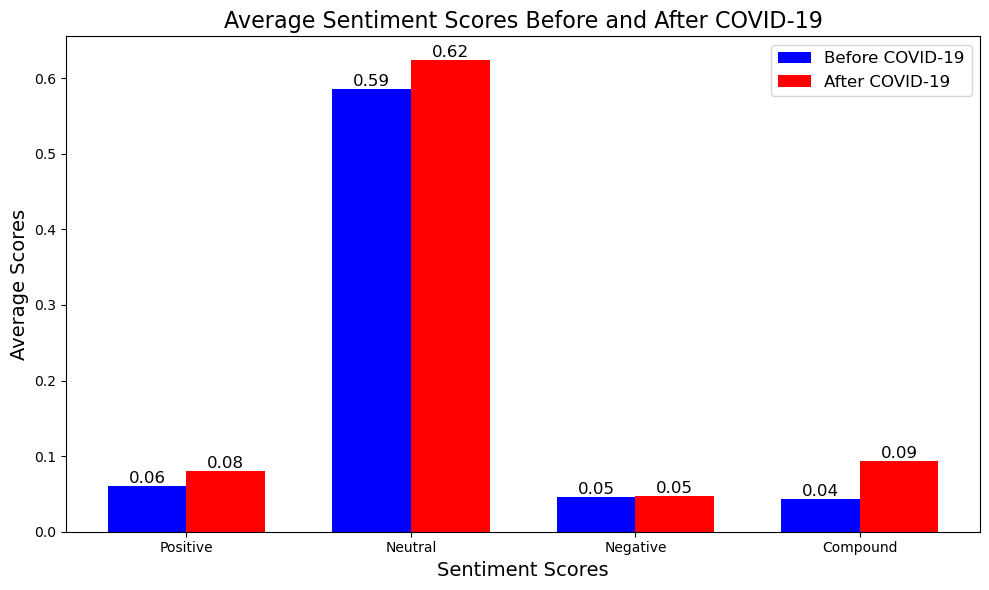

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores

# Calculate sentiment scores for each response
df['sentiment_scores'] = df['combined_text'].apply(get_sentiment_scores)

# Convert the sentiment scores into a DataFrame
sentiment_df = pd.json_normalize(df['sentiment_scores'])

# Combine the sentiment DataFrame with the original DataFrame
df = pd.concat([df, sentiment_df], axis=1)

# Calculate average sentiment scores before and after COVID
average_sentiment_before_covid = before_covid_df['combined_text'].apply(get_sentiment_scores).apply(pd.Series).mean()
average_sentiment_after_covid = after_covid_df['combined_text'].apply(get_sentiment_scores).apply(pd.Series).mean()

print(f"Average sentiment scores before COVID-19:\n{average_sentiment_before_covid}\n")
print(f"Average sentiment scores after COVID-19:\n{average_sentiment_after_covid}\n")

# Plot sentiment scores before and after COVID
fig, ax = plt.subplots(figsize=(10, 6))
x_labels = ['Positive', 'Neutral', 'Negative', 'Compound']
before_scores = average_sentiment_before_covid[['pos', 'neu', 'neg', 'compound']]
after_scores = average_sentiment_after_covid[['pos', 'neu', 'neg', 'compound']]

bar_width = 0.35
index = np.arange(len(x_labels))

bars1 = ax.bar(index, before_scores, bar_width, label='Before COVID-19', color='blue')
bars2 = ax.bar(index + bar_width, after_scores, bar_width, label='After COVID-19', color='red')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Sentiment Scores', fontsize=14)
ax.set_ylabel('Average Scores', fontsize=14)
ax.set_title('Average Sentiment Scores Before and After COVID-19', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x_labels)
ax.legend(fontsize=12)

# Add the sentiment score above each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

fig.tight_layout()

plt.savefig('average_sentiment_scores_pre_post_covid.png')

plt.show()


In [18]:
# Convert Start Date to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Define pre-COVID and post-COVID periods
pre_covid = df[df['Start Date'] < '2020-03-13']
post_covid = df[df['Start Date'] >= '2020-03-13']

# Relevant column for satisfaction
satisfaction_column = 'During the past year, in general how\nsatisfied were you with the outpatient mental health services your family\nmember received?'

# Exclude "Did not know/answer" responses
pre_covid_satisfaction = pre_covid[satisfaction_column].dropna().astype(str)
pre_covid_satisfaction = pre_covid_satisfaction[pre_covid_satisfaction != 'Did not know/answer']

post_covid_satisfaction = post_covid[satisfaction_column].dropna().astype(str)
post_covid_satisfaction = post_covid_satisfaction[post_covid_satisfaction != 'Did not know/answer']

# Display the counts for satisfaction levels pre- and post-COVID
pre_covid_satisfaction_counts = pre_covid_satisfaction.value_counts().sort_index()
post_covid_satisfaction_counts = post_covid_satisfaction.value_counts().sort_index()

# Calculate the total number of responses for pre-COVID and post-COVID
total_pre_covid = pre_covid_satisfaction_counts.sum()
total_post_covid = post_covid_satisfaction_counts.sum()

# Combine pre and post COVID satisfaction counts into a single DataFrame for comparison
satisfaction_comparison = pd.DataFrame({
    'Pre-COVID': pre_covid_satisfaction_counts,
    'Post-COVID': post_covid_satisfaction_counts
}).fillna(0)

# Convert counts to percentages
satisfaction_comparison_percent = satisfaction_comparison.copy()
satisfaction_comparison_percent['Pre-COVID'] = (satisfaction_comparison_percent['Pre-COVID'] / total_pre_covid) * 100
satisfaction_comparison_percent['Post-COVID'] = (satisfaction_comparison_percent['Post-COVID'] / total_post_covid) * 100

# Display the filtered DataFrame with percentages
satisfaction_comparison_percent_filtered = satisfaction_comparison_percent.drop(index='Did not know/answer', errors='ignore')
satisfaction_comparison_percent_filtered

,Pre-COVID,Post-COVID
"During the past year, in general how satisfied were you with the outpatient mental health services your family member received?",,
Not satisfied at all,22.594440,22.248244
Somewhat dissatisfied,18.032787,20.374707
Somewhat satisfied,36.421953,37.470726
Very satisfied,22.950820,19.906323


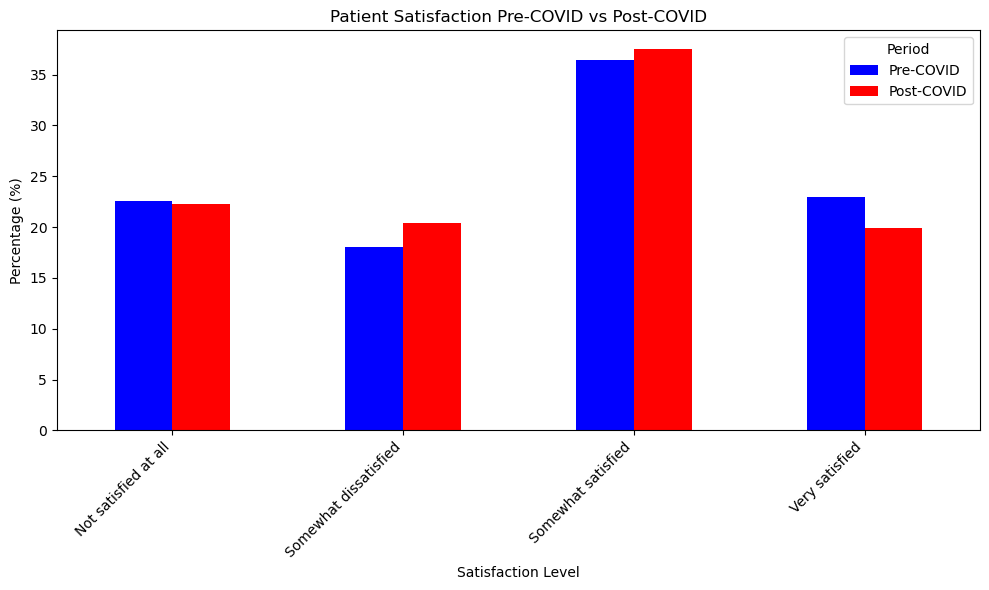

In [24]:
# Plot the filtered data with specified colors for pre-COVID and post-COVID
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors
colors = ['blue', 'red']

# Plot with colors
satisfaction_comparison_percent_filtered.plot(kind='bar', ax=ax, color=colors)

# Set plot title and labels
ax.set_title('Patient Satisfaction Pre-COVID vs Post-COVID')
ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Percentage (%)')
ax.set_xticklabels(satisfaction_comparison_percent_filtered.index, rotation=45, ha='right')

# Add legend
plt.legend(title='Period', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

In [23]:
# Map satisfaction levels to numerical values
satisfaction_mapping = {
    'Not satisfied at all': 1,
    'Somewhat dissatisfied': 2,
    'Somewhat satisfied': 3,
    'Very satisfied': 4
}

# Map the satisfaction levels to numerical values
pre_covid_satisfaction_numeric = pre_covid_satisfaction.map(satisfaction_mapping)
post_covid_satisfaction_numeric = post_covid_satisfaction.map(satisfaction_mapping)

# Calculate the mean and standard deviation for pre-COVID
pre_covid_mean = pre_covid_satisfaction_numeric.mean()
pre_covid_std = pre_covid_satisfaction_numeric.std()

# Calculate the mean and standard deviation for post-COVID
post_covid_mean = post_covid_satisfaction_numeric.mean()
post_covid_std = post_covid_satisfaction_numeric.std()

# Create a DataFrame to display the average satisfaction and standard deviation
satisfaction_stats = pd.DataFrame({
    'Period': ['Pre-COVID', 'Post-COVID'],
    'Average Satisfaction': [pre_covid_mean, post_covid_mean],
    'Standard Deviation': [pre_covid_std, post_covid_std]
})

# Display the DataFrame
satisfaction_stats

,Period,Average Satisfaction,Standard Deviation
0,Pre-COVID,2.597292,1.073434
1,Post-COVID,2.550351,1.045522
